<ipython-input-3-e9f85d5a80aa>:69: UserWarning: Removing 2879 trailing epochs
  warnings.warn('Removing %i trailing epochs' % extra_epochs)


Found 40319 epochs and 13 complete days
Found 0 missing sleep values, which will be ignored

The calculated SRI is 64.8
The calculated sleep midpoint is epoch 1255
SRI: 64.82638888888889
Midpoint (in minutes): 1255


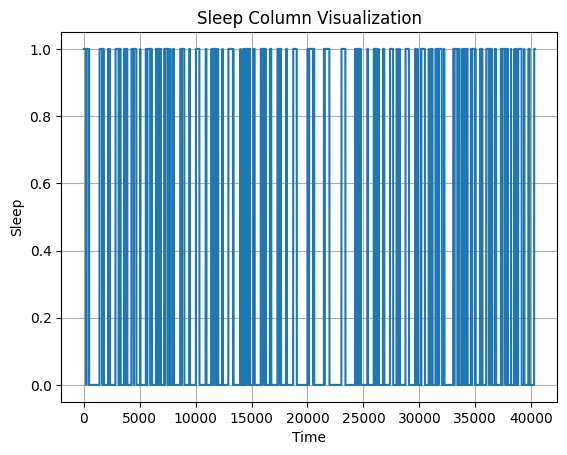

In [ ]:
from IPython import get_ipython
from IPython.display import display
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

"""
Source/inspiration: https://github.com/mengelhard/sri/blob/master/example.ipynb

Lunsford-Avery, J.R., Engelhard, M.M., Navar, A.M. et al. Validation of the Sleep Regularity Index in Older Adults
and Associations with Cardiometabolic Risk. Sci Rep 8, 14158 (2018). https://doi.org/10.1038/s41598-018-32402-5

"""

# Define the sampling rate

EPOCHS_PER_DAY = 2880  # Define the number of epochs per day

# Upload CSV
# Please replace with the actual path to your CSV file (it must contain sleep_column='sleep')

file_path = 'sample_data.csv'

try:
  # Attempt to read the CSV file
  df = pd.read_csv(file_path)
except FileNotFoundError:
  # Handle the case where the file is not found
  print(f"Error: File not found at path: {file_path}")
  print("Please make sure the CSV file is here...")

# Define the functions

def calculate_sri(arr, EPOCHS_PER_DAY):
    return 200 * np.nanmean(arr[:-EPOCHS_PER_DAY] == arr[EPOCHS_PER_DAY:]) - 100


def calculate_midpoint(arr, EPOCHS_PER_DAY, start_epoch=0):
     '''Circular mean: Note that sleep==1 -> sleep, sleep==0 -> wake'''

     sleep_mat = np.reshape(arr, (-1, EPOCHS_PER_DAY))

     cosines = np.cos(np.arange(EPOCHS_PER_DAY) * 2 * np.pi / EPOCHS_PER_DAY)[None, :]
     sines = np.sin(np.arange(EPOCHS_PER_DAY) * 2 * np.pi / EPOCHS_PER_DAY)[None, :]

     tm = (
         EPOCHS_PER_DAY *
         np.arctan2(
             np.nansum(sines * sleep_mat),
             np.nansum(cosines * sleep_mat)
         )
         // (2 * np.pi)
     )

     # Convert epoch to minutes
     midpoint_minutes = (tm + start_epoch) % EPOCHS_PER_DAY
     midpoint_minutes = int(midpoint_minutes)

     return midpoint_minutes


def remove_trailing_epochs(arr, EPOCHS_PER_DAY):
    extra_epochs = len(arr) % EPOCHS_PER_DAY

    if extra_epochs > 0:
        warnings.warn('Removing %i trailing epochs' % extra_epochs)
        return arr[:-extra_epochs]
    else:
        return arr.copy()


# Function to calculate SRI and midpoint form the data

def calculate_sri_from_data(df, EPOCHS_PER_DAY, sleep_column='sleep', plot=False):
    sleep = df[sleep_column].values

    n_epochs = len(sleep)
    n_days = len(sleep) // EPOCHS_PER_DAY

    sleep = remove_trailing_epochs(sleep, EPOCHS_PER_DAY)

    # Calculate SRI and midpoint
    sri = calculate_sri(sleep, EPOCHS_PER_DAY)
    midpoint = calculate_midpoint(sleep, EPOCHS_PER_DAY)

    print('Found %i epochs and %i complete days' % (n_epochs, n_days))
    print('Found %i missing sleep values, which will be ignored' % np.sum(np.isnan(sleep)))
    print()
    print('The calculated SRI is %.1f' % sri)
    print('The calculated sleep midpoint is epoch %i' % midpoint)

    return sri, midpoint

# Now, calculate SRI and sleep midpoint
sri, midpoint = calculate_sri_from_data(df, EPOCHS_PER_DAY, sleep_column='sleep')

print(f"SRI: {sri}")
print(f"Midpoint (in minutes): {midpoint}")

plt.plot(df['sleep'])
plt.xlabel('Time')
plt.ylabel('Sleep')
plt.title('Sleep Column Visualization')
plt.grid(True)
plt.show()